# Transmission Competition - Aquilino - Papina - Steiner

### Approach

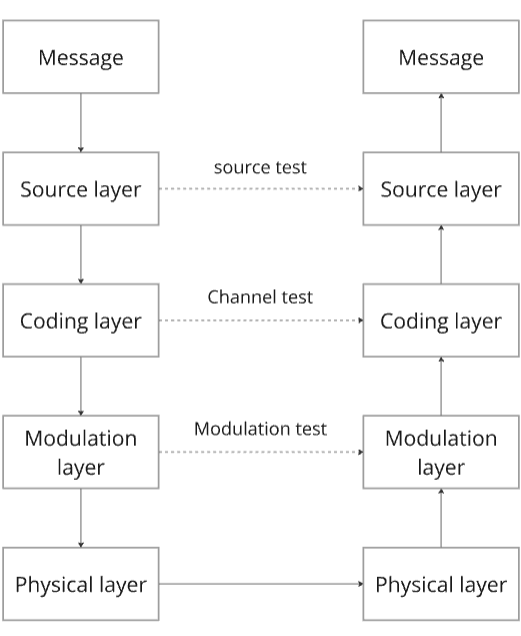

### Data frame encapsulation

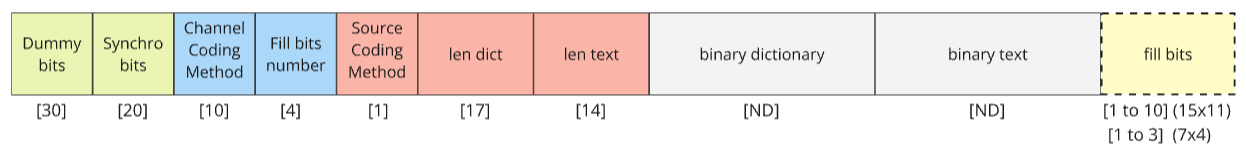

In [1]:
import TC_Functions as TC
import numpy as np
import scipy

## Source Coding Layer

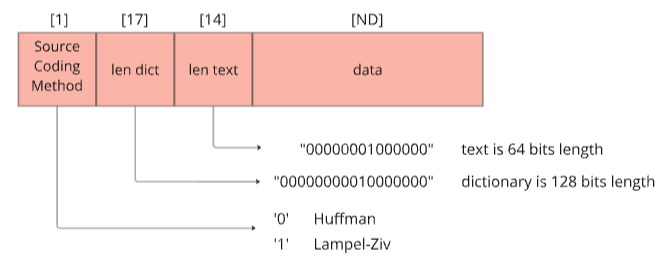

In [2]:
# Functional test for the Source coding layer
print("Simulation of a correct encoding and decoding- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
text = open("CL_text.txt", 'r').read()
print('@source_coding_layer-> Text:', text)
# Get information about the test
TC.get_info_text(text)
# Encode the text using huffman coding and LZW coding
source_encoded_data = TC.source_encoding(text)
# Decode the text using huffman coding and LZW coding
decoded_text = TC.source_decoding(source_encoded_data)
if decoded_text ==  text:
    print("SOURCE CODING LAYER PASSED")
else:
    print("SOURCE CODING LAYER FAILED")


Simulation of a correct encoding and decoding- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
@source_coding_layer-> Text: Hello, Hello and Hello
@source_coding_layer->Entropy: 2.889916845319988
@source_coding_layer->Entropy of a uniform distribution: 3.169925001442312
@source_coding_layer->Redundancy: 0.08833273847012801
@source_coding_layer-> Text: Hello, Hello and Hello
@source_coding_layer.HFM-> HUFFMAN ENCODING ////////////////////////////////////////////////
@source_coding_layer.HFM-> Encoded text: 1011100101111000010010111001011111000001001100101001011100101111
@source_coding_layer.HFM-> Huffman dictionary: {' ': '100', ',': '0000', 'H': '101', 'a': '0001', 'd': '0010', 'e': '110', 'l': '01', 'n': '0011', 'o': '111'}
@source_coding_layer.LZW-> LZW ENCODING ////////////////////////////////////////////////
@source_coding_layer.LZW-> Encoded text: [0, 1, 2, 2, 3, 4, 5, 9, 11, 3, 5, 6, 7, 8, 15, 10, 12]
@source_coding_layer.LZW-> Dictionary: {'H': 0, 'e': 1, 'l': 2, 'o'

## Channel Coding Layer

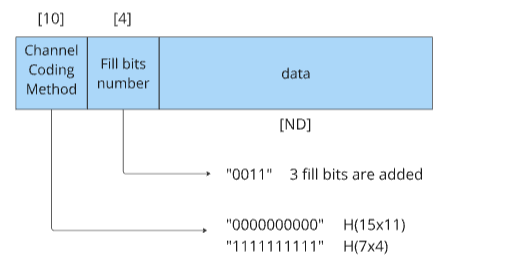

In [5]:
# Functional test for the Channel coding layer
msg_1 = [1,0,1,0,1,0,1,0,1,0,1] # 11 bits
msg_2 = [0,0,0,0,0,1,1,1,1,1,1] # 11 bits
msg_3 = [0,0,1,1] # 4 bits
 
msg = msg_1 + msg_2 + msg_3
 
Hamming_size = "7x4"
 
# simulation of a correct transmission
print("Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)
print("codeword rx: ", coded_msg)
decoded_msg,fill_bits_number,errors = TC.channel_decoding(coded_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)
if decoded_msg == msg:
    print("CHANNEL CODING LAYER PASSED")
    print("Number of errors: ", errors)
else:
    print("! ! ! CHANNEL CODING LAYER FAILED ! ! !")
    print("Number of errors: ", errors)
 
# simulation of a transmission with 1 error
print("Simulation of a 1 bit error transmission- - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)
# invert the first bit
coded_msg[0][0] = 1 - coded_msg[0][0]
print("codeword rx: ", coded_msg)
decoded_msg,fill_bits_number,errors = TC.channel_decoding(coded_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)
if decoded_msg == msg:
    print("CHANNEL CODING LAYER PASSED")
    print("Number of errors: ", errors)
else:
    print("! ! ! CHANNEL CODING LAYER FAILED ! ! !")
    print("Number of errors: ", errors)
   
# simulation of a transmission with 2 errors
print("Simulation of a 2 bit errors transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("message tx: ", msg)
coded_msg = TC.channel_coding(msg,Hamming_size)
print("codeword tx: ", coded_msg)
# invert the first two bits
coded_msg[0][0] = 1 - coded_msg[0][0]
coded_msg[0][1] = 1 - coded_msg[0][1]
print("codeword rx: ", coded_msg)
decoded_msg,fill_bits_number,errors = TC.channel_decoding(coded_msg,Hamming_size)
decoded_msg = decoded_msg[:(len(decoded_msg)-fill_bits_number)]
print("message rx: ", decoded_msg)
if decoded_msg == msg:
    print("CHANNEL CODING LAYER PASSED")
    print("Number of errors: ", errors)
else:
    print("! ! ! CHANNEL CODING LAYER FAILED ! ! !")
    print("Number of errors: ", errors)


Simulation of a correct transmission - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
message tx:  [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
@channel_coding_layer-> ENCODING DATA ////////////////////////////////////////////////
@channel_coding_layer-> SPLITTING DATA ////////////////////////////////////////////////
@channel_coding_layer-> Packets:  [[0, 0, 1, 0], [1, 0, 1, 0], [1, 0, 1, 0], [1, 0, 1, 0], [0, 0, 0, 0], [1, 1, 1, 1], [1, 1, 0, 0], [1, 1, 0, 0]]
@channel_coding_layer-> ENCODING DATA PACKETS ////////////////////////////////////////
codeword tx:  [array([0, 1, 0, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 1, 0, 1, 0], dtype=int32), array([1, 0, 1, 1, 0, 1, 0], dtype=int32), array([0, 0, 0, 0, 0, 0, 0], dtype=int32), array([1, 1, 1, 1, 1, 1, 1], dtype=int32), array([0, 1, 1, 1, 1, 0, 0], dtype=int32), array([0, 1, 1, 1, 1, 0, 0], dtype=int32)]
codeword rx:  [array([0, 1, 0, 1, 0, 1, 0

## Source Coding Layer + Channel Coding Layer

In [4]:
# legenda:
# ----------------------Transmitter (TX)--------------------
# MSG_TX: message transmitted
# SE_TX: source encoded data transmitted
# CE_TX: channel encoded data transmitted

# ----------------------Receiver (RX)-----------------------
# CE_RX: channel encoded data received
# CD_RX: channel decoded data received
# SD_RX: source decoded data received
# MSG_RX: message received

# user argument input
mode = input("mode, transmission [T] or reception [R]: ")

# check the correct input
if mode != 'T' and mode != 'R':
    print("Error: wrong input")
    exit()
elif mode == 'T':
    print("TRANSMISSION MODE")
    
    # mode and options
    Hamming_size = "7x4"
    
    text_file_name = input("text file: ")
    # Import text from file
    MSG_TX = open(text_file_name+".txt", 'r').read()
    TC.get_info_text(MSG_TX)
    # source coding
    # Encode the text using huffman coding and LZW coding
    SE_TX = TC.source_encoding(MSG_TX)
    # channel coding
    channel_encoded_packets = TC.channel_coding(SE_TX,Hamming_size)
    CE_TX = TC.channel_coding_encapsulate(channel_encoded_packets,Hamming_size)
    # save as .txt file
    np.savetxt('SCD.txt', CE_TX, fmt='%d')


    print("@physical_layer-> TRANSMISSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    

elif mode == 'R':
    print("RECEPTION MODE")
    print("@physical_layer-> RECEPTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

    # get the data from the .txt file
    CE_RX = np.loadtxt('SCD.txt', dtype=int)

    # channel decoding
    deserialized_msg,Hamming_size = TC.channel_coding_decapsulate(CE_RX)
    CD_RX,fill_bits_number, errors = TC.channel_decoding(deserialized_msg,Hamming_size)
    CD_RX = CD_RX[:(len(CD_RX)-fill_bits_number)]
    print("@channel_coding_layer-> Number of errors:", errors)
    # source decoding
    SD_RX = TC.source_decoding(CD_RX)
    MSG_RX = SD_RX

    # Check if the received message is equal to the transmitted message
    original_text_name = input("original text file for correctness check: ")
    if MSG_RX == open(original_text_name+".txt", 'r').read():
        print("MESSAGE CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)
    else:
        print("MESSAGE NOT CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)

RECEPTION MODE
@physical_layer-> RECEPTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
@channel_coding_layer-> DECODING DATA PACKETS ////////////////////////////////////////
@channel_coding_layer-> Decoded Packets:  [array([0, 0, 0, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([1, 0, 0, 0], dtype=int32), array([1, 1, 1, 0], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 1, 0], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([1, 0, 1, 0], dtype=int32), array([0, 0, 1, 0], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 0], dtype=int32), array([0, 0, 1, 1], dtype=int32), array([0, 0, 0, 1], dtype=int32), array([1, 0, 1, 0], dtype=int32), array([0, 1, 1, 1], dtype=int32), array([0, 0, 1, 1], dtype=int32), arra

## Modulation Layer

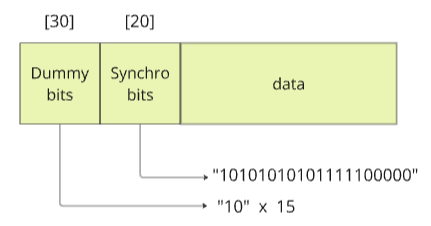                  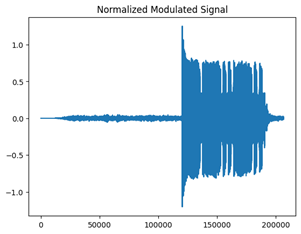

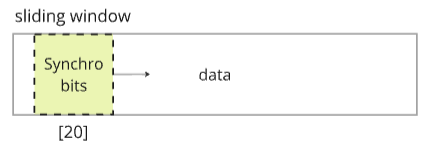

Time : 1.7


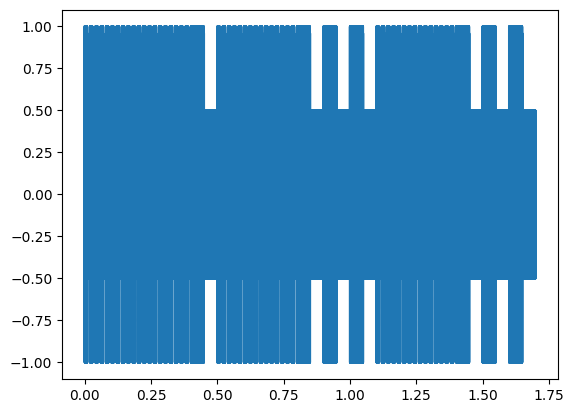

In [5]:
import TC_Functions as TC
import numpy as np
import matplotlib.pyplot as plt

# 30 bits frame
frame1 = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
frame2 = [1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]
#frame3 = CE_TX
frame = frame1 + frame2 + frame1 + frame2

frame = TC.syncro_bits_addition(frame)

modulated_frame = TC.am_modulate(frame, fs=44e3, fc=2e3, num_cycles=20)
#display the audio signal
plt.plot(np.arange(len(modulated_frame)) / 44e3, modulated_frame)
TC.display_audio_signal(modulated_frame, fs=44e3)

print("Time : " +  str(len(modulated_frame)/44e3))




Recording... Press 'q' to stop.


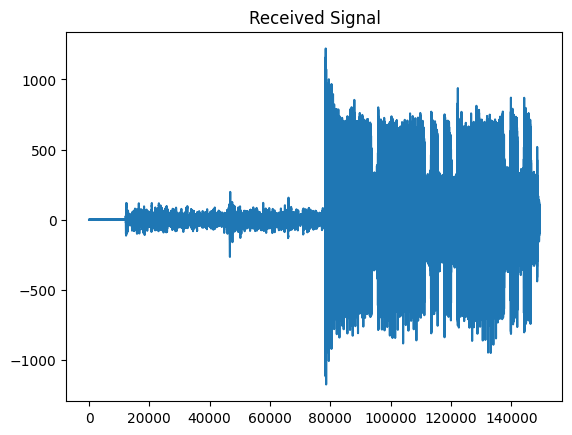

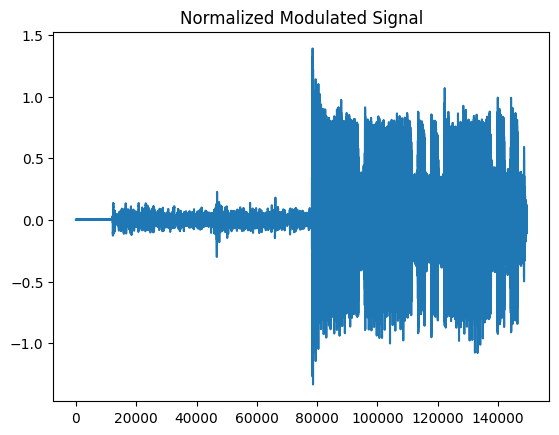

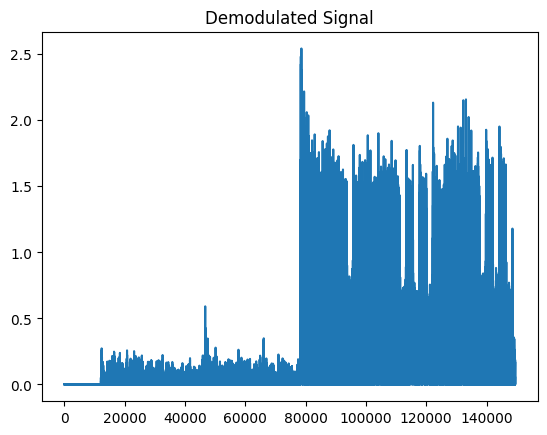

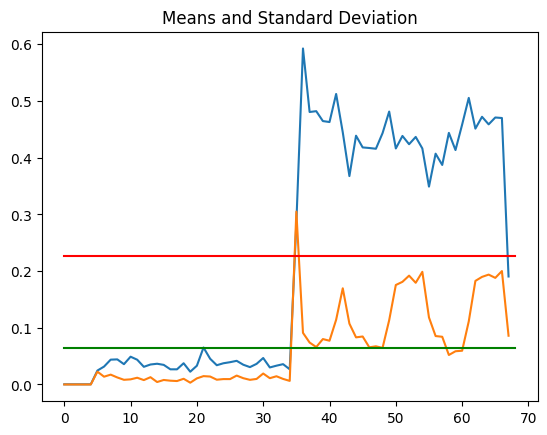

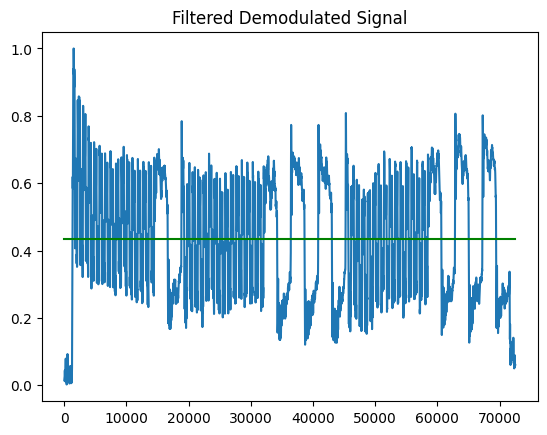

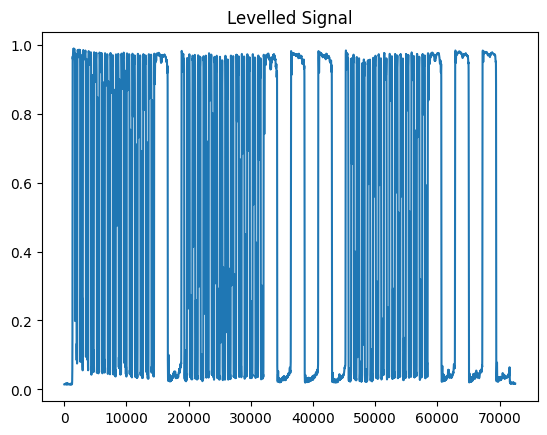

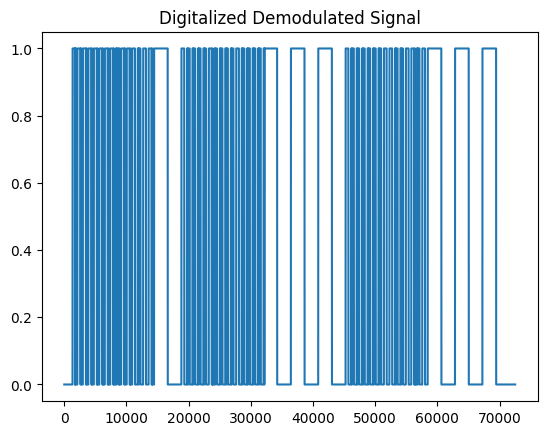

demodulated_signal:  [0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]


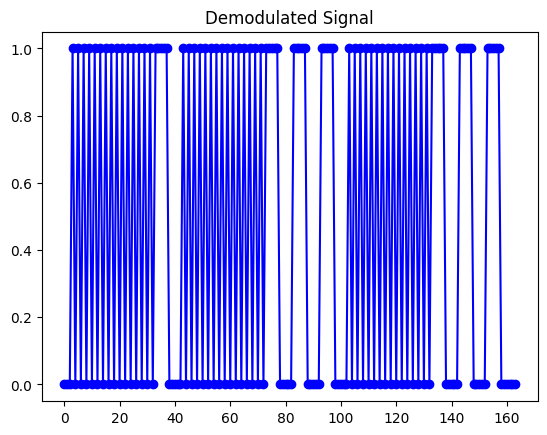

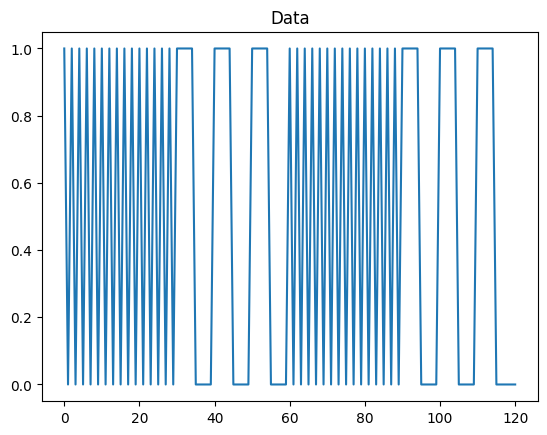

data:  [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 0]


In [5]:
import TC_Functions as TC
import matplotlib.pyplot as plt
import numpy as np

#record the data from the microphone
fs_M_RX, received_signal = TC.record_audio(int(44e3))

# # read the received signal from the CSV file
# received_signal = np.genfromtxt('RX_modulated_trial.csv', delimiter=',')

plt.figure()
plt.plot(received_signal)
plt.title('Received Signal')
plt.show()

# AM demodulation
demodulated_signal = TC.am_demodulate(received_signal,fs=44e3, fc=2e3, num_cycles=20)

# Plot the demodulated signal
plt.figure()
plt.plot(demodulated_signal,'b',marker='o')
plt.title('Demodulated Signal')
print("demodulated_signal: ", demodulated_signal)

# synchronization bits detection and data extraction
data = TC.syncro_bits_detection(demodulated_signal)
plt.figure()
plt.plot(data)
plt.title('Data')
plt.show()

print("data: ", data)


## Source + Channel + Modulation + Syncronization

In [6]:
import TC_Functions as TC
import numpy as np
import scipy
# legenda:
# ----------------------Transmitter (TX)--------------------
# MSG_TX: message transmitted
# SE_TX: source encoded data transmitted
# CE_TX: channel encoded data transmitted
# M_TX : modulated data transmitted

# ----------------------Receiver (RX)-----------------------
# M_RX : modulated data received
# CE_RX: channel encoded data received
# CD_RX: channel decoded data received
# SD_RX: source decoded data received
# MSG_RX: message received

# user argument input
mode = input("mode, transmission [T] or reception [R]: ")

# check the correct input
if mode != 'T' and mode != 'R':
    print("Error: wrong input")
    exit()
elif mode == 'T':
    print("TRANSMISSION MODE")
    # mode and options
    Hamming_size = "7x4"
    # Get the text file name
    text_file_name = input("text file: ")
    # Import text from file
    MSG_TX = open(text_file_name+".txt", 'r').read()
    TC.get_info_text(MSG_TX)
    # source coding
    # Encode the text using huffman coding and LZW coding
    SE_TX = TC.source_encoding(MSG_TX)
    # channel coding
    channel_encoded_packets = TC.channel_coding(SE_TX,Hamming_size)
    CE_TX = TC.channel_coding_encapsulate(channel_encoded_packets,Hamming_size)
    # Add synchronization bits at the beginning of data (10x5+1111+0000)
    CE_TX = TC.syncro_bits_addition(CE_TX)

    # AM modulation
    M_TX = TC.am_modulate(CE_TX,fs=44e3, fc=7e3, num_cycles=20)
    
    # Chirp modulation 
    #M_TX = TC.chirp_modulate(CE_TX, fs=44e3, fc=8e3, bw = 4e3, T = 0.03)
    
    # write the data in a wav file
    scipy.io.wavfile.write('M.wav', int(44e3), np.array(32760 * M_TX, dtype=np.int16))

    #display the audio signal
    TC.display_audio_signal(M_TX, fs=44e3)

    print("Time : " +  str(len(M_TX)/44e3))
    print( str(len(CE_TX)) + " bits to send")


    print("@physical_layer-> TRANSMISSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    

elif mode == 'R':
    print("RECEPTION MODE")
    print("@physical_layer-> RECEPTION <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

    reading_mode = input("mode, read a file [F] or record [R]: ")

    if reading_mode != 'T' and mode != 'R':
        print("Error: wrong input")
        exit()
    elif reading_mode == 'F' :
        # get the data from the .m4a file
        fs_M_RX, M_RX = scipy.io.wavfile.read('M.wav')
        M_RX = M_RX / 32760

    elif reading_mode == 'R':
        # record the data from the microphone
        fs_M_RX, M_RX = TC.record_audio(int(44e3))
        M_RX = M_RX / 32760

    
    # AM demodulation
    CE_RX = TC.am_demodulate(M_RX,fs=44e3, fc=2e3, num_cycles=50)
    print("CE_RX: ", CE_RX)
    # Remove synchronization bits and all before
    CE_RX = TC.syncro_bits_detection(CE_RX)
    print("CE_RX: ", CE_RX)

    """
    # Chirp dedmodulation 
    CE_RX = TC.chirp_demodulate(M_RX, fs_M_RX)
    print(len(CE_RX))
    """

    # channel decoding
    deserialized_msg,Hamming_size = TC.channel_coding_decapsulate(CE_RX)
    CD_RX,fill_bits_number = TC.channel_decoding(deserialized_msg,Hamming_size)
    CD_RX = CD_RX[:(len(CD_RX)-fill_bits_number)]

    # source decoding
    SD_RX = TC.source_decoding(CD_RX)
    MSG_RX = SD_RX

    # Check if the received message is equal to the transmitted message
    original_text_name = input("original text file for correctness check: ")
    if MSG_RX == open(original_text_name+".txt", 'r').read():
        print("MESSAGE CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)
    else:
        print("MESSAGE NOT CORRECTLY RECEIVED")
        TC.get_info_text(MSG_RX)

TRANSMISSION MODE
@source_coding_layer->Entropy: 4.154380619526597
@source_coding_layer->Entropy of a uniform distribution: 4.807354922057604
@source_coding_layer->Redundancy: 0.13582818683408682
@source_coding_layer-> Text: quote from claude shannon, the father of information theory.
my greatest concern was what to call it. i thought of calling it information, but the word was overly used, so i decided to call it uncertainty. when i discussed it with john von neumann, he had a better idea. von neumann told me, you should call it entropy, for two reasons. in the first place your uncertainty function has been used in statistical mechanics under that name, so it already has a name. in the second place, and more important, no one really knows what entropy really is, so in a debate you will always have the advantage.
@source_coding_layer.HFM-> HUFFMAN ENCODING ////////////////////////////////////////////////
@source_coding_layer.HFM-> Encoded text: 01100101101101100011011110001001001111010

Time : 22.482954545454547
7914 bits to send
@physical_layer-> TRANSMISSION >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
